<h1> Deconstructing Stats </h1>

<h2> Covariance </h2>

<h3>short covariance from scratch </h3>

In [1]:
import numpy as np
from numpy import mean, std, var
#economic grouth x
x = np.array([2.1, 2.5,4.0,3.6])

#y SnP
y= np.array([8,12,14,10])

n = len(x)

In [50]:
covar=      sum( (x - mean(x)) * (y - mean(y))) / (n-1)
covar

1.5333333333333332

In [10]:
print(np.cov(x,y))
np.cov(x,y)[1,0]

[[0.80333333 1.53333333]
 [1.53333333 6.66666667]]


1.5333333333333332

In [24]:
xStd= x.std(ddof=1) # degrees of freedom 1 / divisor is N - 1 for sample
yStd= std(y, ddof=1)

<p> <span style="color:purple"> write the covariance `covar1` formula from scratch for A and B   </span>

In [12]:
A = np.array([4,5,6,6,7])
B = np.array([30,34,33,37,37])

2.85

In [25]:
covar1=      sum((A - mean(A)) * (B - mean(B))) / (len(A)-1)
print(covar1)
np.cov(A,B)

2.85


array([[1.3 , 2.85],
       [2.85, 8.7 ]])

<h2> Correlation </h2>

In [35]:
#cont cnt cont
xStd = np.std(x)
yStd=np.std(y)
r = covar / (xStd * yStd) # or covar / math.sqrt(xVar *yVar)
r

0.8834318429373718

In [23]:
r

0.662573882203029

In [45]:
#numpy correlation
np.corrcoef(x,y)
np.corrcoef(x,y)[1,0]

0.662573882203029

<p> <span style="color:purple"> given x and y compute `r1` correlation from scratch </span>

In [46]:
x = np.array([2.1, 2.5,4.0,3.6])
#y SnP
y= np.array([8,12,14,10])
n = len(x)


In [51]:
xStd = np.std(x, ddof=1)
yStd=np.std(y, ddof=1)
covar=      sum( (x - mean(x)) * (y - mean(y)) ) / (n-1)
r1 = covar / (xStd*yStd)
r1


0.662573882203029

<h2> the Art of Sampling </h2>

<h3> basic sampling with numpy </h3>

In [14]:
import numpy as np
popul = ['a','b','c', 'd','e']

In [8]:
sample = np.random.choice(popul, 2, replace=False)
print (sample)

['c' 'e']


<h2>Generate synthetic data </h2>

In [1]:
import scipy.stats as ss

`ss.norm(mean, std).rvs((numR, numC))` specify mean and std

In [17]:
ss.norm(0,1).rvs((5,2))
ss.norm(1,1).rvs((5,2))

array([[ 0.05076831,  1.12804211],
       [ 0.92090432,  2.08067225],
       [ 3.49129089,  1.16863711],
       [ 0.67744803, -0.2994339 ],
       [ 1.05144704,  0.29829872]])

`concatenate( (array1, array2 ), axis=num)`

In [27]:
np.concatenate( (ss.norm(0,1).rvs((5,2)),( ss.norm(1,1).rvs((5,2)) ) ), axis=0 )

array([[-1.31567525, -0.15441621],
       [ 0.70985111,  0.05818718],
       [-2.11181795,  0.53662029],
       [-1.0516779 ,  1.06322632],
       [ 0.52199154,  0.11577475],
       [ 2.61745152,  1.27199673],
       [ 1.06439651,  1.50128517],
       [ 0.78865368,  1.37464853],
       [ 0.62047872, -0.04778489],
       [ 1.13461293,  0.37638266]])

In [43]:
def generate_synth_data(n=50):
    '''create two sets of point for bivariate distribution , n repetitions'''
    points = np.concatenate( ( ss.norm(0,1).rvs((n,2)),( ss.norm(1,1).rvs((n,2)) ) ), axis=0 )
    outcomes = np.concatenate( ( np.repeat(0,n), np.repeat(1,n) ) )
    return  (points, outcomes)

In [41]:
n=5
(points, outcomes) =generate_synth_data(n)
print(points)
print(outcomes)


[[ 1.79655366  0.08271133]
 [ 0.95361496  0.14435663]
 [-0.90155403  0.40565925]
 [ 0.35206849 -0.50410612]
 [-1.14631677  0.05272889]
 [ 0.09165596  0.22214894]
 [ 1.95353155  2.31226145]
 [ 1.18704607  1.30164688]
 [ 1.91089556 -0.10389737]
 [ 0.65385275  0.68314432]]
[0 0 0 0 0 1 1 1 1 1]


<h4>plotting </h4>

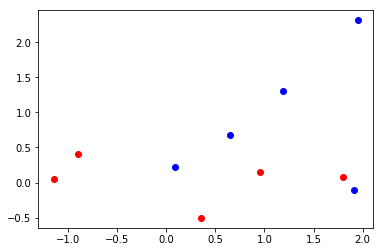

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(points[:n,0], points[:n,1], 'ro')
plt.plot(points[n:,0], points[n:,1], 'bo')
plt.savefig("bivardata.pdf")